# Students and Alcohol Consumption

### Context
[Kaggle’s Student Alcohol Consumption survey](https://www.kaggle.com/uciml/student-alcohol-consumption#student-por.csv) was conducted among students at Gabriel Pereira and Mousinho da Silveira secondary school in Porto, Portugal. Students in math and Portuguese language courses were selected to participate in the data collection. The survery contains various social, gender, and study information about students in regards to predicting their final grade.

Since this dataset consists of two parts, math and Portuguese language courses, we will merge together the files and examine it as one set. There are 382 students that belong to both datasets so we will join the files without overlapping data points. We will also assume that this dataset is a representative sample of the entire student population among the schools and each variable is independent of each other. 


In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
%matplotlib inline

In [2]:
# Load and merge math and Portuguese language course files 
d1 = pd.read_csv('student-mat.csv')
d2 = pd.read_csv("student-por.csv")

data = pd.merge(d1, d2, how='outer', on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet","guardian","traveltime","studytime","famsup","activities","higher","romantic","famrel","freetime","goout","Dalc","Walc","health","schoolsup"])


### Sample of Dataset

In [3]:
display(data.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,absences_x,G1_x,G2_x,G3_x,failures_y,paid_y,absences_y,G1_y,G2_y,G3_y
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,6.0,5.0,6.0,6.0,0.0,no,4.0,0.0,11.0,11.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,4.0,5.0,5.0,6.0,0.0,no,2.0,9.0,11.0,11.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,10.0,7.0,8.0,10.0,0.0,no,6.0,12.0,13.0,12.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2.0,15.0,14.0,15.0,0.0,no,0.0,14.0,14.0,14.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,4.0,6.0,10.0,10.0,0.0,no,0.0,11.0,13.0,13.0


There are 33 attributes to the dataset. A few features that will be examine later include: 

    sex : Student's sex (binary: 'F' - female or 'M' - male)

    age : Student's age (numeric: from 15 to 22)

    address : Student's home address type (binary: 'U' - urban or 'R' - rural)

    Dalc : Workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

    Walc : Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

In [4]:
sample_data = data[['sex','age','address','Dalc','Walc']]
sample_data.head()

,sex,age,address,Dalc,Walc
0,F,18,U,1,1
1,F,17,U,1,1
2,F,15,U,2,3
3,F,15,U,1,1
4,F,16,U,1,2


In [5]:
# Calculate gender ratio
print(data['age'].groupby(data['sex']).sum())
fem_ratio = round((6675/(6675+4654))* 100)
print("F:" + str(fem_ratio) + "%")

mal_ratio = round((4654/(6675+4654))* 100)
print("M:" + str(mal_ratio) + "%")

sex
F    6675
M    4654
Name: age, dtype: int64
F:59%
M:41%


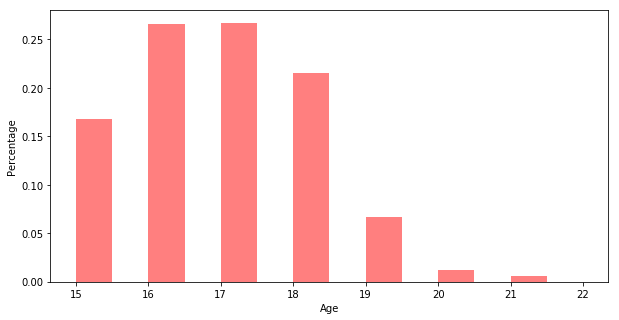

In [6]:
# Plot age distribution 

data.age.unique()
plt.figure(figsize=(10,5))
plt.hist(data.age,bins=7, color='r', alpha=0.5,width=0.5,density=True)
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.show()

This survery consists of 674 students, ages ranging from 15 to 22. The population consisted of 59% female and 41% male students.

### Let's take a look at characteristics of alcohol consumption during weekdays and weekends



Weekday alcohol consumption (Dalc) and weekend alcohol consumption (Walc) is measured on a numeric scale from 1 (very low) to 5 (very high). In order to better conceptualize the value of each number, we will convert the numeric scale to categorical groups. 

In [7]:
# Convert Alcohol consumption level 
l = [1,2,3,4,5]
labels="1-Very Low","2-Low","3-Moderate","4-High","5-Very High"

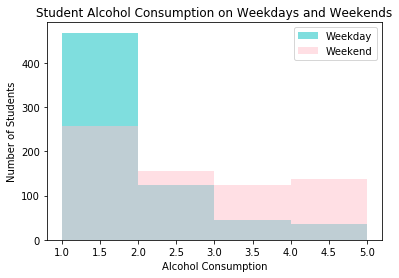

In [8]:
# Comparing Student Alcohol Consumption on Weekdays and Weekends
x = data.Dalc
y = data.Walc


plt.hist(x, color='c',bins=np.arange(1, 6), alpha=.5) 
plt.hist(y, color='pink',bins=np.arange(1, 6), alpha=.5)
plt.title('Student Alcohol Consumption on Weekdays and Weekends')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Number of Students')
plt.legend(['Weekday','Weekend'])

plt.show()

According to the data, most students consume very low levels of alcohol throughout the week. There does appear to be a slight increase of alcohol consumption during the weekend as the mean rises from 1.5 (very low) on the weekdays to  2.3 (low) on the weekends. 

### Which age group has the highest alcohol consumption during weekdays or weekends?


In [9]:
# Create age groups
age15=data[(data.age==15)]
age16=data[(data.age==16)]
age17=data[(data.age==17)]
age18=data[(data.age==18)]
age19=data[(data.age==19)]
age20=data[(data.age==20)]
age21=data[(data.age==21)]
age22=data[(data.age==22)]

In [10]:
d= {"Feature": ["All Students","Age 15","Age 16","Age 17","Age 18", "Age 19", "Age 20", "Age 21","Age 22"],
    "Count": [data.shape[0],age15.shape[0],age16.shape[0],age17.shape[0],age18.shape[0],age19.shape[0],age20.shape[0],age21.shape[0],age22.shape[0]],
    "Average Working Day Alcohol Consumption": [data.Dalc.mean(),age15.Dalc.mean(),age16.Dalc.mean(),age17.Dalc.mean(),age18.Dalc.mean(),age19.Dalc.mean(),age20.Dalc.mean(),age21.Dalc.mean(),age22.Dalc.mean()],
    "Average Weekend Alcohol Consumption": [data.Walc.mean(),age15.Walc.mean(),age16.Walc.mean(),age17.Walc.mean(),age18.Walc.mean(),age19.Walc.mean(),age20.Walc.mean(),age21.Walc.mean(),age22.Walc.mean()]}

df=pd.DataFrame(d)

In [11]:
df

,Feature,Count,Average Working Day Alcohol Consumption,Average Weekend Alcohol Consumption
0,All Students,674,1.500000,2.278932
1,Age 15,113,1.380531,2.026549
2,Age 16,179,1.396648,2.234637
3,Age 17,180,1.550000,2.433333
4,Age 18,145,1.551724,2.379310
5,Age 19,45,1.644444,2.044444
6,Age 20,8,1.625000,2.625000
7,Age 21,3,3.000000,2.000000
8,Age 22,1,5.000000,5.000000


Based on the mean of the alcohol consumption during weekdays by age groups, age 22 has the highest consumption level with 5.0. However, the mean might be biased since there was only one student who identified as age 22. 

If we disregard age 22 as an outlier, group age 21 consumes the highest level of alcohol on weekdays with a mean level of 3.0. Meanwhile, students in age group 17 consume the most alcohol during weekends with a mean consumption of 2.4.

#### We will combine age ranges to create 3 new groups and compare the consumption level 
New groups consists of the following:

    mid teens: ages 15 and 16
    
    late teens: ages 17 and 18
    
    adult ages 19 to 22 

In [12]:
# Create new age groups
data['mid_teens']=data[(data.age==15)] & data[(data.age==16)]
data['late_teens']=data[(data.age==17)] & data[(data.age==18)]
data['adult']=data[(data.age==19)] & data[(data.age==20)] & data[(data.age==21) & data[(data.age==22)]]

ValueError: Wrong number of items passed 39, placement implies 1

### Which gender consumes more alcohol weekly?

In [13]:
# Create geneders

female=data[data.sex=="F"]
male= data[data.sex=="M"]

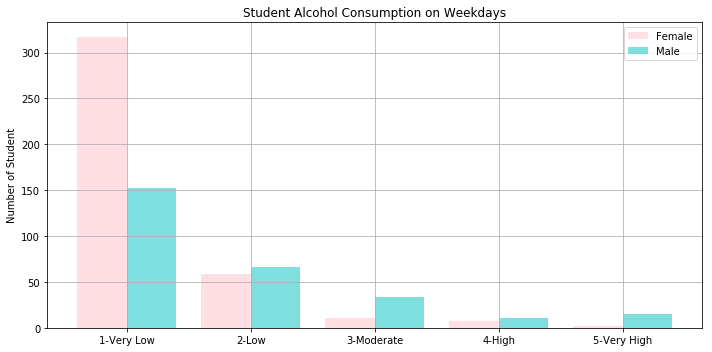

In [21]:
# Plot gender alcohol consumption during weekdays
female_weekday= list(map(lambda l: list(female.Dalc).count(l),l))
male_weekday= list(map(lambda l: list(male.Dalc).count(l),l))

n = 5
fig, ax = plt.subplots(figsize=(10,5))
i = np.arange(n)    
w = 0.4   

plot1= plt.bar(i, female_weekday, w, color="pink", alpha=.5)
plot2= plt.bar(i+w, male_weekday, w, color="c", alpha=.5)

plt.ylabel('Number of Student')
plt.title('Student Alcohol Consumption on Weekdays')
plt.xticks(i+w/2, labels)
plt.legend((plot1[0],plot2[0]),("Female","Male"))
plt.tight_layout()
plt.grid()
plt.show()



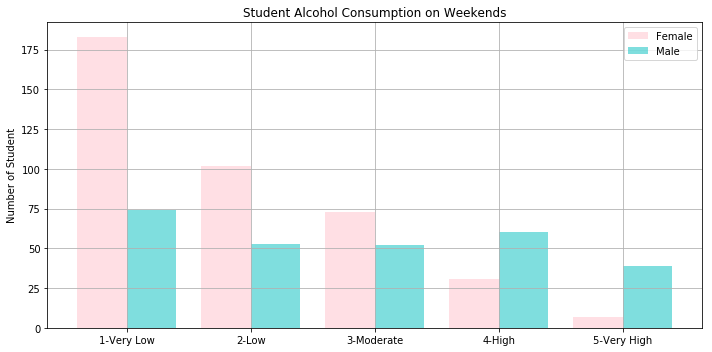

In [22]:
# Plot gender alcohol consumption during weekends
female_weekend= list(map(lambda l: list(female.Walc).count(l),l))
male_weekend= list(map(lambda l: list(male.Walc).count(l),l))

n = 5
fig, ax = plt.subplots(figsize=(10,5))
i = np.arange(n)    
w = 0.4   

plot1= plt.bar(i, female_weekend, w, color="pink", alpha=.5)
plot2= plt.bar(i+w, male_weekend, w, color="c", alpha=.5)

plt.ylabel('Number of Student')
plt.title('Student Alcohol Consumption on Weekends')
plt.xticks(i+w/2, labels)
plt.legend((plot1[0],plot2[0]),("Female","Male"))
plt.tight_layout()
plt.grid()
plt.show()

Base on the graphs above, female students generally consume very low level of alcohol throughout the entire week than male students. Male students also tend to consume higher levels of alcohol on a weekly basis. 

### Do students in ubran areas consume more alcohol than those who live in rural areas?

In [23]:
urban=data[data.address=="U"]
rural= data[data.address=="R"]

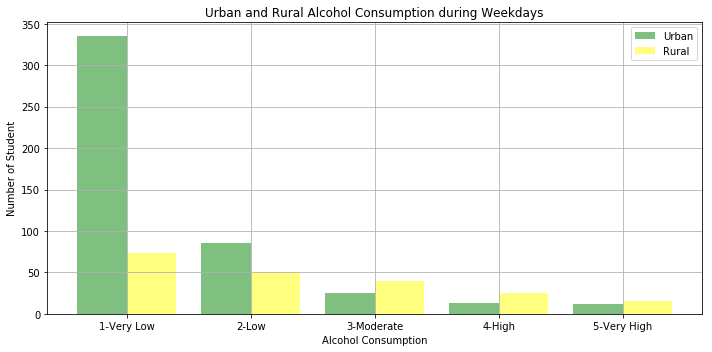

In [24]:
urban_weekday=list(map(lambda l: list(urban.Dalc).count(l),l))
rural_weekday=list(map(lambda l: list(rural.Walc).count(l),l))


n = 5
fig, ax = plt.subplots(figsize=(10,5))
i = np.arange(n)   
w = 0.4   

plot1= plt.bar(i, urban_weekday, w, color="green", alpha=.5)
plot2= plt.bar(i+w, rural_weekday, w, color="yellow", alpha=.5 )

plt.xlabel('Alcohol Consumption')
plt.ylabel('Number of Student')
plt.title('Urban and Rural Alcohol Consumption during Weekdays')
plt.xticks(i+w/2, labels)
plt.legend((plot1[0],plot2[0]),("Urban","Rural"))
plt.tight_layout()
plt.grid()
plt.show()

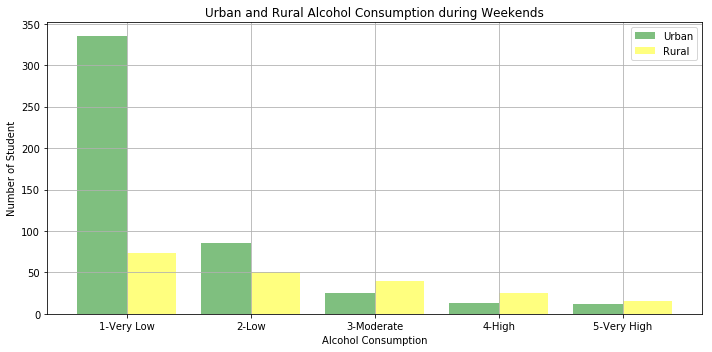

In [25]:
urban_weekend=list(map(lambda l: list(urban.Dalc).count(l),l))
rural_weekend=list(map(lambda l: list(rural.Walc).count(l),l))

n = 5
fig, ax = plt.subplots(figsize=(10,5))
i = np.arange(n)    
w = 0.4 
p1= plt.bar(i, urban_weekday, w, color="green", alpha=.5)
p2= plt.bar(i+w,rural_weekend, w, color="yellow", alpha=.5)

plt.ylabel('Number of Student')
plt.xlabel('Alcohol Consumption')
plt.title('Urban and Rural Alcohol Consumption during Weekends')
plt.xticks(i+w/2, labels)
plt.legend((p1[0],p2[0]),("Urban","Rural"))
plt.tight_layout()
plt.grid()
plt.show()

Students in urban settings consumes less alcohol than students in rural areas. 

### Conclusion 

Based on the analysis, we can conclude the following:

Generally, students tend to consume higher levels of alcohol during weekends. There also appears to be a positive coorelation between increased alcohol consumption and age groups. Students in older age groups consume more alcohol on average than younger students. Male students also consume more and higher levels of alcohol than female students throughout the week. The data also shows that students residing in urban settings consume less alcohol than students in rural areas. 

In terms of analyzing the data, I found that certain variable types were not appropriately assigned. For instance, weekday and weekend alcohol consumption variables were labeled as numeric values. This presented a challenge since the measurements were subjected to a numeric rating system instead of a concrete number of alcohol intake. 

With the following information, I would recommend quantifying on the amount of alcohol consumption over a semester to predict students final grade. 
 